<a href="https://colab.research.google.com/github/patrickguevara23/projeto-spam/blob/main/Projeto_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte: https://www.kaggle.com/datasets/chandramoulinaidu/spam-classification-for-basic-nlp/data

1 --> Spam
0 --> Not Spam

Imports

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
import seaborn as sns
from string import punctuation
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams
import joblib
import numpy as np

In [2]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
!pip install unidecode
import unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.4 MB/s eta 0:00:00


Leitura dos Dados e Interpretação dos Dados

Distribuição das categorias:
 CATEGORY
0    3900
1    1896
Name: count, dtype: int64


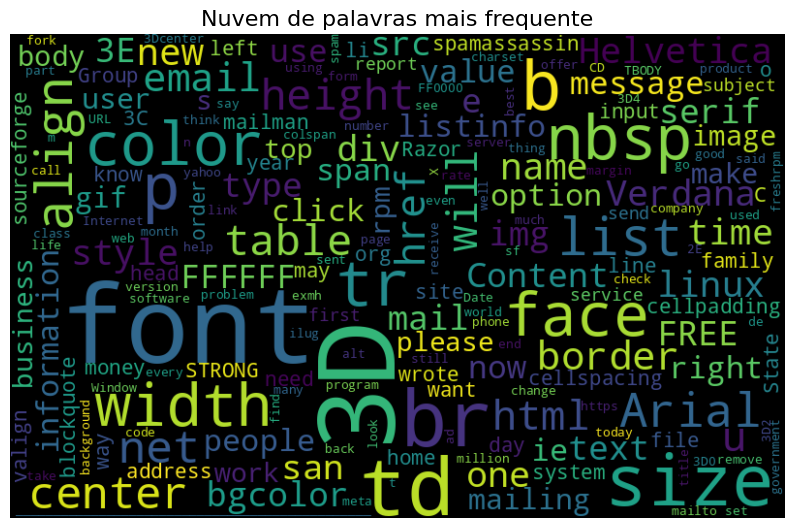

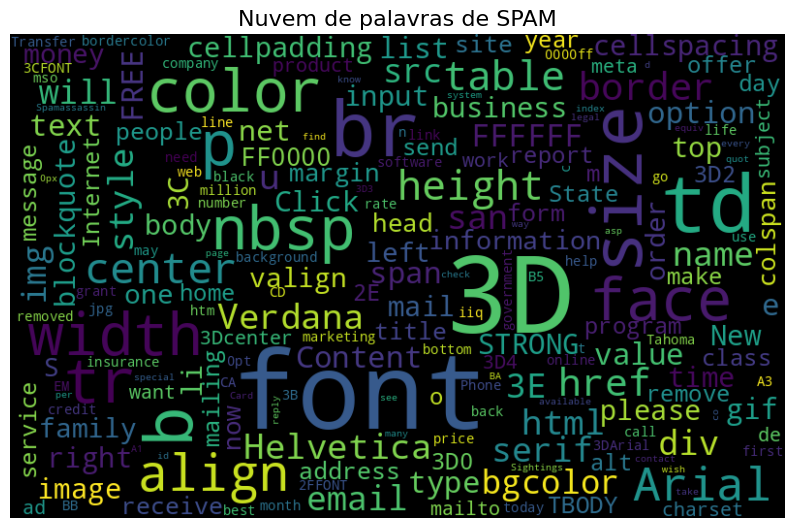

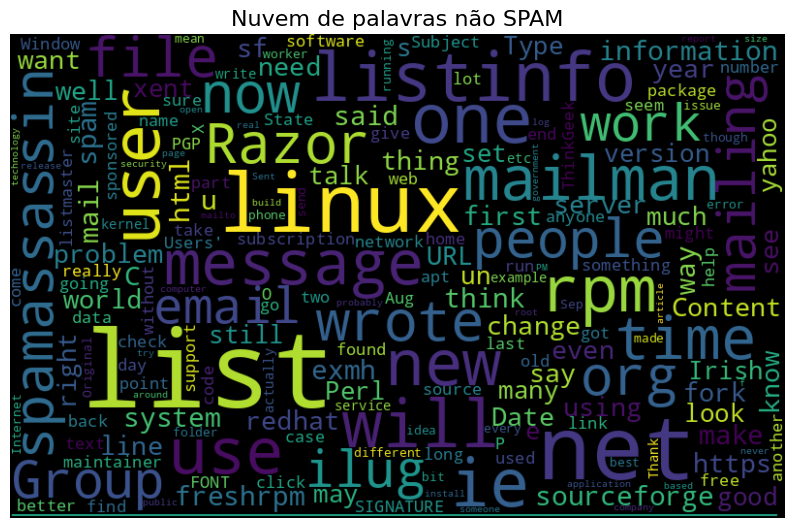

In [11]:
#Leitura dos dados
df = pd.read_csv('/content/Spam Email raw text for NLP.csv')
#Verificando se os dados estão desbalanceados
print("Distribuição das categorias:\n",df.CATEGORY.value_counts())

#Vetorizando a coluna MESSAGE e gerado uma bag of words
vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(df.MESSAGE)

#Gerando uma wordcloud com as palavras mais frequentes do texto
todas_palavras =' '.join([texto for texto in df.MESSAGE])
nuvem_de_palavras = WordCloud(width = 800, height = 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)

plt.figure(figsize = (10,7))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de palavras mais frequente', fontsize = 16)
plt.show()

#Gerando uma função para exibir uma wordcloud com os emails que são SPAM
def nuvem_palavras_spam(texto, coluna_texto):
    texto_positivo = texto.query("CATEGORY == 1")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.title('Nuvem de palavras de SPAM', fontsize = 16)
    plt.show()

nuvem_palavras_spam(df,'MESSAGE')

#Gerando uma função para exibir uma wordcloud com os emails que não são SPAM
def nuvem_palavras_not_spam(texto, coluna_texto):
    texto_negativo = texto.query("CATEGORY == 0")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.title('Nuvem de palavras não SPAM', fontsize = 16)
    plt.show()

nuvem_palavras_not_spam(df,'MESSAGE')

In [5]:
#Tokenizando o dataset
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

#Salvando as Stopwords em uma variável
palavras_irrelevantes = nltk.corpus.stopwords.words('english')

#Separando o conjunto em treino e teste para o modelo
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, df.CATEGORY, random_state = 42)

#Função para medir a acurácia de cada tratamento
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

#Modelo de Based Line(sem tratamento)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)


#Tratamento 1 - Remoção de Stopwords
frase_processada = list()
for opiniao in df.MESSAGE:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["tratamento_1"] = frase_processada
acuracia_1 = classificar_texto(df, "tratamento_1", "CATEGORY")


#Tratamento 2 - Remoção de pontuação
token_pontuacao = tokenize.WordPunctTokenizer()
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes #adicionando o tratamento 1 ao tratamento 2

frase_processada = list()
for opiniao in df["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["tratamento_2"] = frase_processada
acuracia_2 = classificar_texto(df, "tratamento_2", "CATEGORY")


#Tratamento 3 - Removendo acentuação
sem_acentos = [unidecode.unidecode(texto) for texto in df["tratamento_2"]]
stop_words_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

df["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in df["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["tratamento_3"] = frase_processada
acuracia_3 = classificar_texto(df, "tratamento_3", "CATEGORY")


#Tratamento 4 - Convertendo todas as palavras para o minúsculo
frase_processada = list()
for opiniao in df["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["tratamento_4"] = frase_processada
acuracia_4 = classificar_texto(df, "tratamento_4", "CATEGORY")


#Tratamento 5 - Removendo prefixos e sufixos
stemmer = PorterStemmer()

frase_processada = list()
for opiniao in df["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

df["tratamento_5"] = frase_processada
acuracia_5 = classificar_texto(df, "tratamento_5", "CATEGORY")


#Tratamento 6 - TF-IDF

#Aplicando aos dados brutos
tfidf = TfidfVectorizer(lowercase=False)
tfidf_bruto = tfidf.fit_transform(df["MESSAGE"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, df["CATEGORY"], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)

#Aplicando ao tratamento 5
tfidf_tratados = tfidf.fit_transform(df["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, df["CATEGORY"], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)

#Tratamento 7 - Ngrams
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(df["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, df["CATEGORY"], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)

In [6]:
#Acurácia de cada modelo
print('Acurácia do tratamento 1:', acuracia_1)
print('Acurácia do tratamento 2:', acuracia_2)
print('Acurácia do tratamento 3:', acuracia_3)
print('Acurácia do tratamento 4:', acuracia_4)
print('Acurácia do tratamento 5:', acuracia_5)
print('Acurácia aplicando TF-IDF nos dados brutos:', acuracia_tfidf_bruto)
print('Acurácia aplicando TF-IDF nos dados tratados:', acuracia_tfidf_tratados)
print('Acurácia aplicando com n-grams:', acuracia_tfidf_ngrams)

Acurácia do tratamento 1: 0.9882677708764666
Acurácia do tratamento 2: 0.9882677708764666
Acurácia do tratamento 3: 0.9889579020013802
Acurácia do tratamento 4: 0.989648033126294
Acurácia do tratamento 5: 0.9903381642512077
Acurácia aplicando TF-IDF nos dados brutos: 0.9786059351276742
Acurácia aplicando TF-IDF nos dados tratados: 0.9696342305037957
Acurácia aplicando com n-grams: 0.9503105590062112
